In [ ]:
#Miguel Joven Trujillo
#Analisis de Datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression, f_classif


In [ ]:
# 1. Cargar los datos
# Asegúrate de proporcionar la ruta correcta al archivo CSV
data = pd.read_csv('C:/Users/MIGUEL/Downloads/archive (2)/winequality-red.csv')

In [ ]:
# 2. Análisis exploratorio de los datos
print(data.head())
print(data.describe())
print(data.info())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

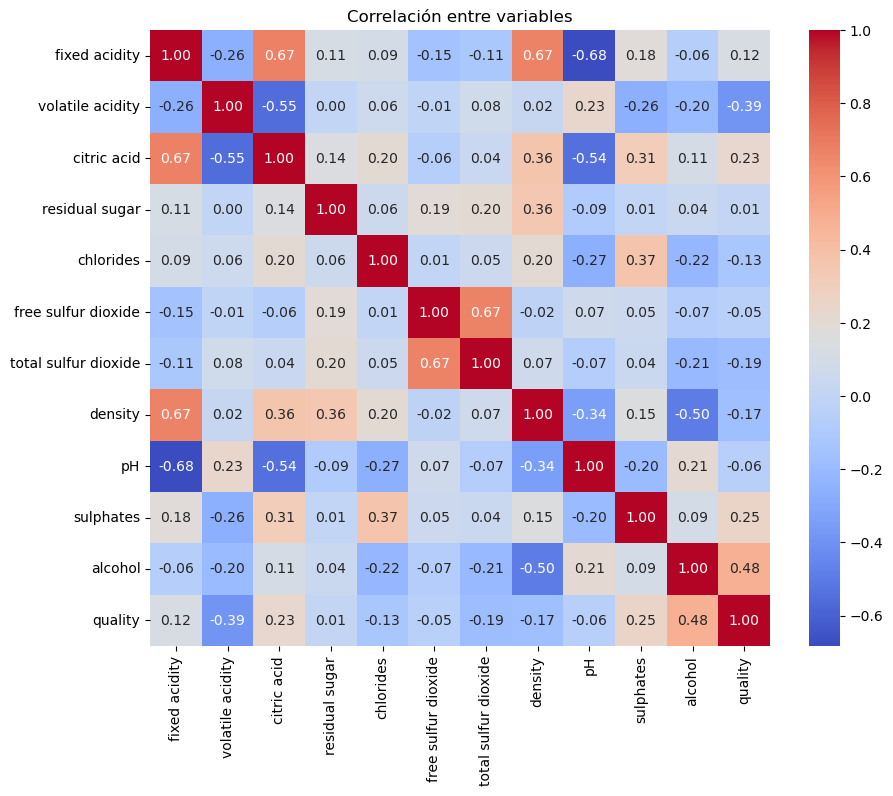

In [ ]:
# Visualización de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()

In [ ]:
# 3. Preprocesar los datos
# Verificar valores faltantes
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Separar características y objetivo
X = data.drop('quality', axis=1)
y = data['quality']

In [ ]:
# 4. Seleccionar características más relevantes
# Usar SelectKBest para regresión
selector = SelectKBest(score_func=f_regression, k=5)  # Cambia k según sea necesario
X_selected = selector.fit_transform(X, y)
print(selector.get_support(indices=True))  # Índices de las características seleccionadas


[ 1  2  6  9 10]


In [ ]:
# 5. Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
# Convertir la variable objetivo a binaria para clasificación
y_binary = (y >= 6).astype(int)  # Clasificación binaria basada en calidad
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [ ]:
# Entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_bin, y_train_bin)
y_pred_tree = tree_model.predict(X_test_bin)

In [ ]:
# Evaluar el Árbol de Decisión
print('Árbol de Decisión:')
print('Accuracy:', accuracy_score(y_test_bin, y_pred_tree))
print(classification_report(y_test_bin, y_pred_tree))

Árbol de Decisión:
Accuracy: 0.715625
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       141
           1       0.75      0.73      0.74       179

    accuracy                           0.72       320
   macro avg       0.71      0.71      0.71       320
weighted avg       0.72      0.72      0.72       320



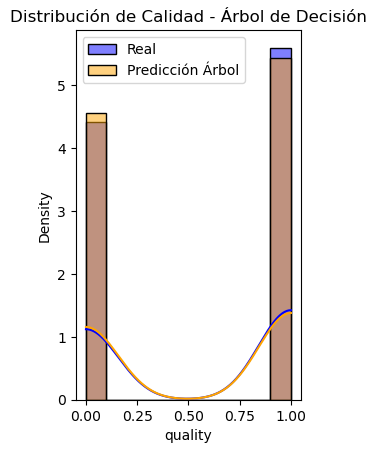

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(y_test_bin, color='blue', label='Real', kde=True, stat='density')
sns.histplot(y_pred_tree, color='orange', label='Predicción Árbol', kde=True, stat='density')
plt.title('Distribución de Calidad - Árbol de Decisión')
plt.legend()

In [ ]:
plt.show()